# DenguDisease Analysis using Time Series Analysis

In [6]:
import pandas as pd
import numpy as np

In [7]:
Dengu = pd.read_csv('Data/DenguDiseas-TS.csv')
Dengu.head()

,year,Cases
0,2009-07,6
1,2009-08,186
2,2009-09,267
3,2009-10,248
4,2009-11,0


In [8]:
Dengu.tail()

,year,Cases
51,2019-08,69816
52,2019-09,23429
53,2019-10,8264
54,2019-11,6125
55,2019-12,1759


In [9]:
Dengu.dtypes

year     object
Cases     int64
dtype: object

In [10]:
Dengu.shape

(56, 2)

# Data Preprocessing

In [11]:
#To check out have any null value in any column on our data set.
Dengu.isnull().sum()

year     0
Cases    0
dtype: int64

In [12]:
#dt_Dengu=Dengu[["year","Cases"]]
#dt_Dengu

In [13]:
#Parse strings to datetime type
Dengu['year'] = pd.to_datetime(Dengu['year'], infer_datetime_format=True)
indexedDengu=Dengu.set_index(['year'])

In [14]:
indexedDengu.dtypes

Cases    int64
dtype: object

In [15]:
#from datetime import datetime
indexedDengu.head(5)

,Cases
year,
2009-07-01,6
2009-08-01,186
2009-09-01,267
2009-10-01,248
2009-11-01,0


In [16]:
indexedDengu = indexedDengu['2009-01-01':'2019-12-1']
indexedDengu.describe()

,Cases
count,56.000000
mean,2968.142857
std,10111.678095
min,0.000000
25%,169.250000
50%,496.500000
75%,987.500000
max,69816.000000


# Plot Our Dataset

In [17]:
import matplotlib.pylab as plt
%matplotlib inline

#Increas the figure size
from matplotlib.pylab import rcParams
rcParams["figure.figsize"]= 10 , 6

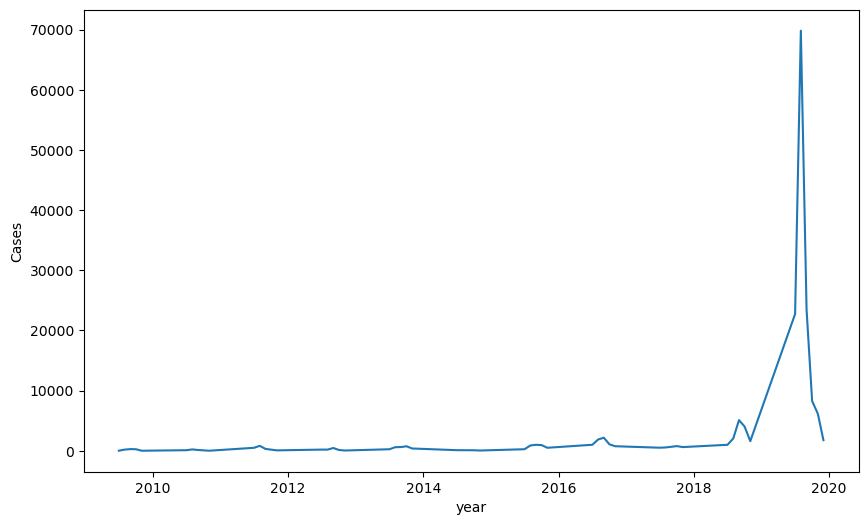

In [18]:
#Plot graph

plt.xlabel("year")
plt.ylabel("Cases")
plt.plot(indexedDengu)

# Checking stationarity

In [19]:
#Definition of stationarity = constant mean and variance

In [20]:
# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

# Determine rolling statisrics

In [21]:
rolmean = indexedDengu.rolling(window = 5).mean()
rolstd = indexedDengu.rolling(window =5).std()

print(rolmean , rolstd)

              Cases
year               
2009-07-01      NaN
2009-08-01      NaN
2009-09-01      NaN
2009-10-01      NaN
2009-11-01    141.4
2010-07-01    157.2
2010-08-01    163.4
2010-09-01    134.2
2010-10-01     97.4
2010-11-01     97.4
2011-07-01    177.8
2011-08-01    297.0
2011-09-01    333.0
2011-10-01    356.4
2011-11-01    368.0
2012-07-01    308.0
2012-08-01    182.0
2012-09-01    212.4
2012-10-01    203.0
2012-11-01    198.4
2013-07-01    209.6
2013-08-01    290.4
2013-09-01    321.0
2013-10-01    442.6
2013-11-01    509.8
2014-07-01    479.0
2014-08-01    378.8
2014-09-01    273.8
2014-10-01    140.6
2014-11-01     72.8
2015-07-01    104.8
2015-08-01    261.2
2015-09-01    442.4
2015-10-01    613.4
2015-11-01    705.4
2016-07-01    853.4
2016-08-01   1052.6
2016-09-01   1288.6
2016-10-01   1316.0
2016-11-01   1367.0
2017-07-01   1269.4
2017-08-01   1006.0
2017-09-01    703.4
2017-10-01    643.6
2017-11-01    614.8
2018-07-01    712.0
2018-08-01   1008.8
2018-09-01   1894.4


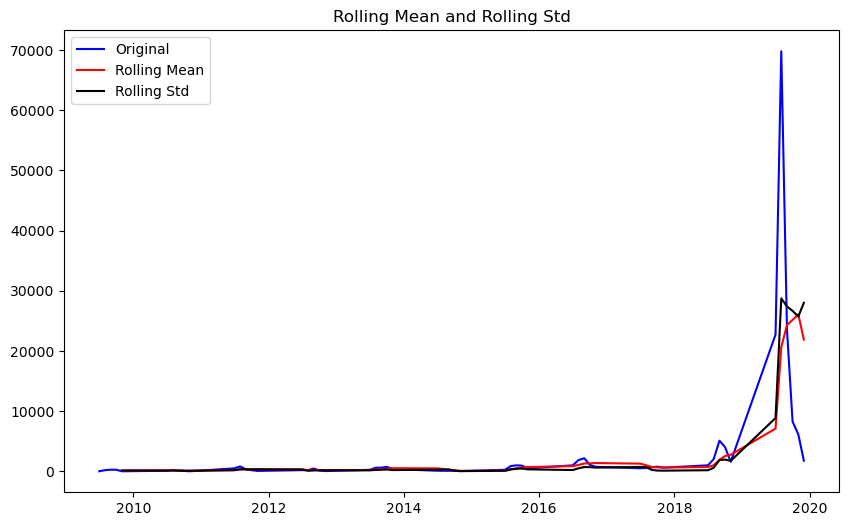

In [22]:
#plot rolling statisrics
orig = plt.plot(indexedDengu, color = "blue", label= "Original")
mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std = plt. plot(rolstd, color = "black", label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean and Rolling Std")
plt.show(block = False)

# Perform Augmented Dickey-Fuller test (ADF)

In [23]:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis

In [24]:
indexedDengu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2009-07-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cases   56 non-null     int64
dtypes: int64(1)
memory usage: 896.0 bytes


In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
print("Result of Dickey-Fuller Test : ")

dftest= adfuller(indexedDengu["Cases"], autolag = "AIC") 

dfoutput = pd.Series(dftest[0:4], index = [
    "Test Statistic", "p-value", "#Lags Used", "Number of Observation Used"
])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value

print(dfoutput)

Result of Dickey-Fuller Test : 
Test Statistic                -3.946064
p-value                        0.001721
#Lags Used                     0.000000
Number of Observation Used    55.000000
Critical Value (1%)           -3.555273
Critical Value (5%)           -2.915731
Critical Value (10%)          -2.595670
dtype: float64


our series is not stationary 

# Now We Make our data Stationary

In [22]:
# Method 1- Differencing and Seasonal differencing

In [28]:
# Method 2 - Transformation

In [24]:
# Method 3- Rolling statistics

# Method 1- Differencing and Seasonal differencing

In [25]:
# Differencing meaning y(t) = y(t)-y(t-1)

<AxesSubplot:xlabel='year'>

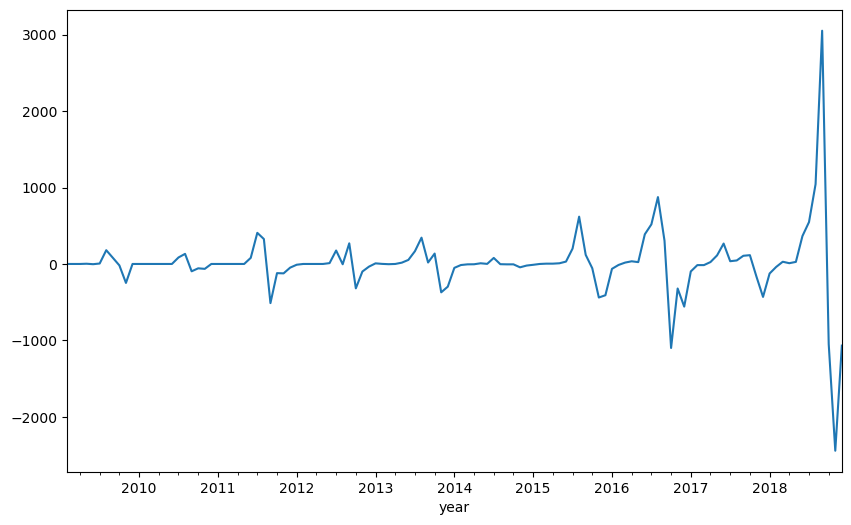

In [26]:
indexedDengu_Cases_diff = indexedDengu["Cases"] - indexedDengu["Cases"].shift(1)
indexedDengu_Cases_diff.dropna().plot()

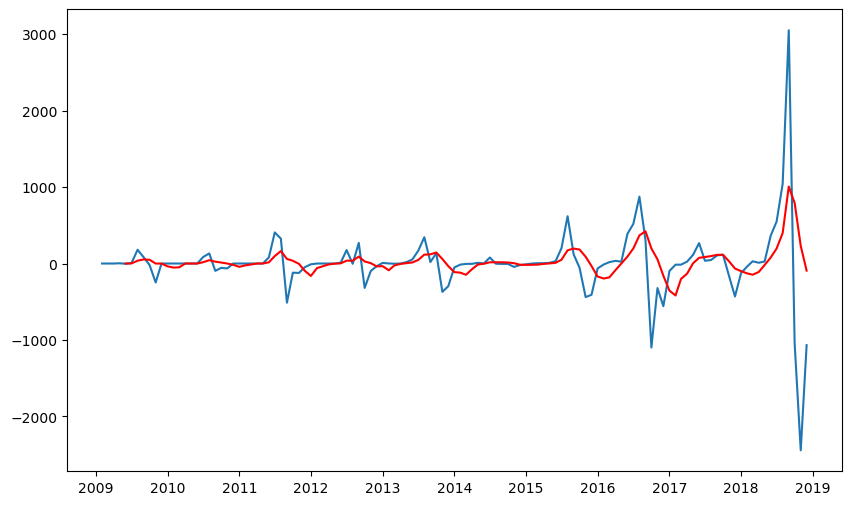

In [27]:
movingAverage = indexedDengu_Cases_diff.rolling(window = 5).mean()
movingSTD = indexedDengu_Cases_diff.rolling(window =5).std()
plt.plot(indexedDengu_Cases_diff)
plt.plot(movingAverage, color = "red")

In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determine rolling statistics
    movingAverage = timeseries.rolling(window = 5).mean()
    movingSTD = timeseries.rolling(window = 5).std()
    
    #plote rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = "black" , label ='Rolling Std' )
    plt.legend(loc = 'best')
    plt.title("Roling Mean and Standerd Deviation")
    plt.show(block = False)
    
    #Performing Dicky Fuller test:
    print("Result of Dickey Fuller Test: ")
    dftest= adfuller(timeseries, autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used '])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

In [29]:
indexedDengu_Cases_diff.shape

(120,)

In [30]:
indexedDengu_Cases_diff.dtypes

dtype('float64')

In [31]:
indexedDengu_Cases_diff.isnull().sum()

1

In [32]:
indexedDengu_Cases_diff_1=indexedDengu_Cases_diff.dropna()

In [134]:
indexedDengu_Cases_diff_1.isnull().sum()

0

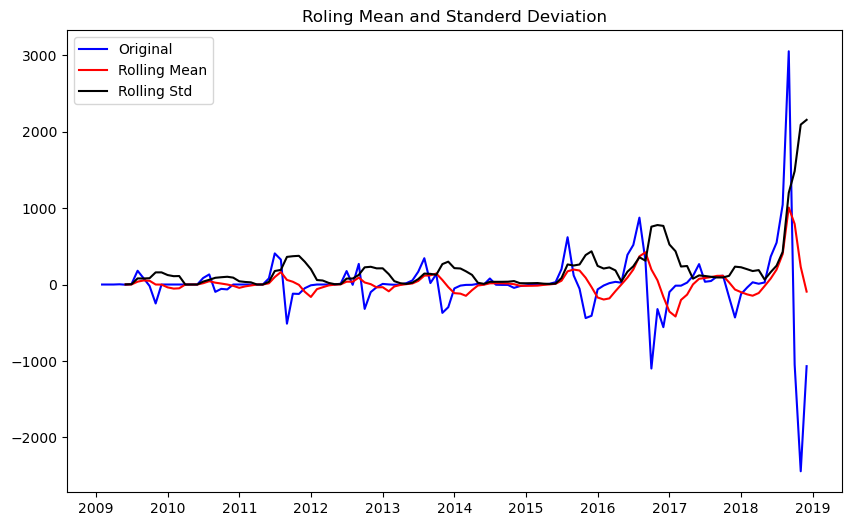

Result of Dickey Fuller Test: 
Test Statistic                 -7.212408e+00
p-value                         2.217223e-10
#Lags Used                      8.000000e+00
Number of Observations Used     1.100000e+02
Critical Value (1%)            -3.491245e+00
Critical Value (5%)            -2.888195e+00
Critical Value (10%)           -2.580988e+00
dtype: float64


In [33]:
test_stationarity(indexedDengu_Cases_diff_1)

In [34]:
# Sesonal differencing meaning - y(t) = y(t)-y(t-n)

<AxesSubplot:xlabel='year'>

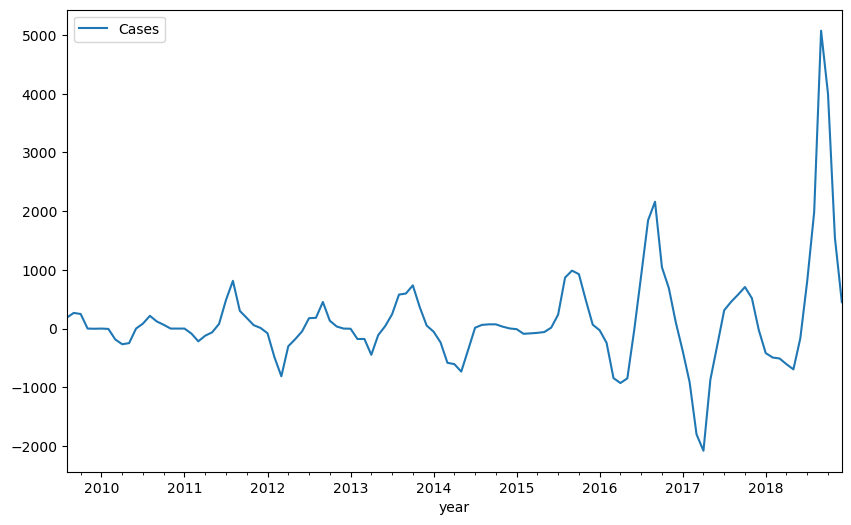

In [35]:
indexedDengu_Cases_diff_7 = indexedDengu - indexedDengu.shift(7)
indexedDengu_Cases_diff_7.dropna().plot()

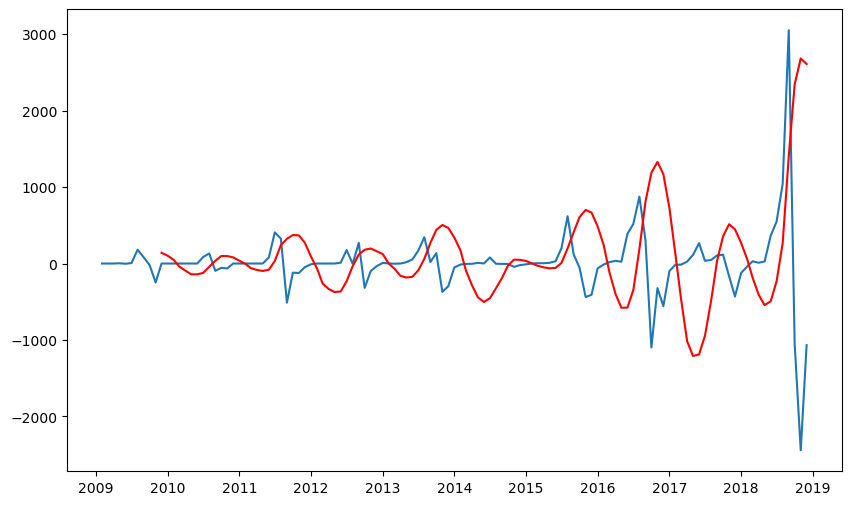

In [36]:
movingAverage = indexedDengu_Cases_diff_7.rolling(window = 5).mean()
movingSTD = indexedDengu_Cases_diff_7.rolling(window =5).std()
plt.plot(indexedDengu_Cases_diff)
plt.plot(movingAverage, color = "red")

In [37]:
indexedDengu_Cases_diff_7_1=indexedDengu_Cases_diff_7.dropna()

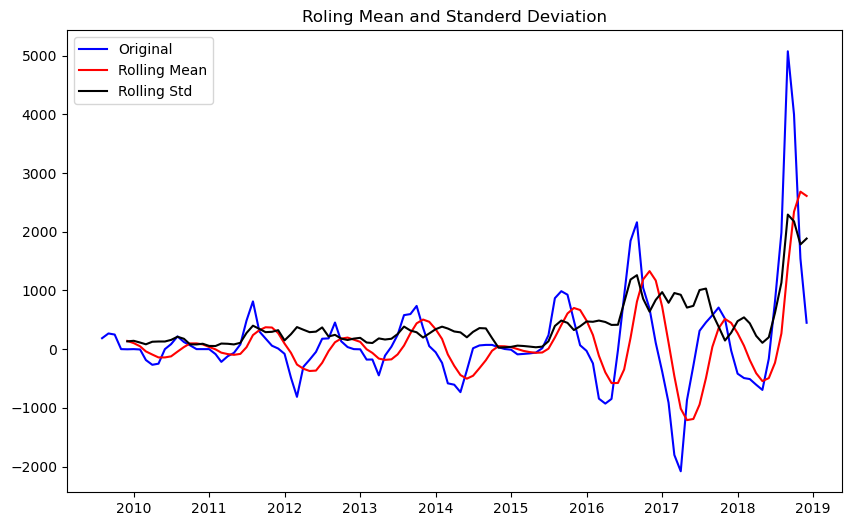

Result of Dickey Fuller Test: 
Test Statistic                 -6.224341e+00
p-value                         5.132009e-08
#Lags Used                      5.000000e+00
Number of Observations Used     1.070000e+02
Critical Value (1%)            -3.492996e+00
Critical Value (5%)            -2.888955e+00
Critical Value (10%)           -2.581393e+00
dtype: float64


In [38]:
test_stationarity(indexedDengu_Cases_diff_7_1)

In [39]:
#Comment ::: Our data is not stationary yet. so we need to apply another model to make out model stationery.

# Method 2 - Transformation

3 Transformation are hear:

1. Log Transformation

2. Square root Transformation

3. Cubed root Transformation

In [105]:
# Create transformation columns
import numpy as np

                                            Log Transformation

In [104]:
                   ###################Calculate the log transformation#######################

In [143]:
indexedDengu['adj_log'] = np.log(indexedDengu['Cases'])

I:\ML-Code\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='year'>

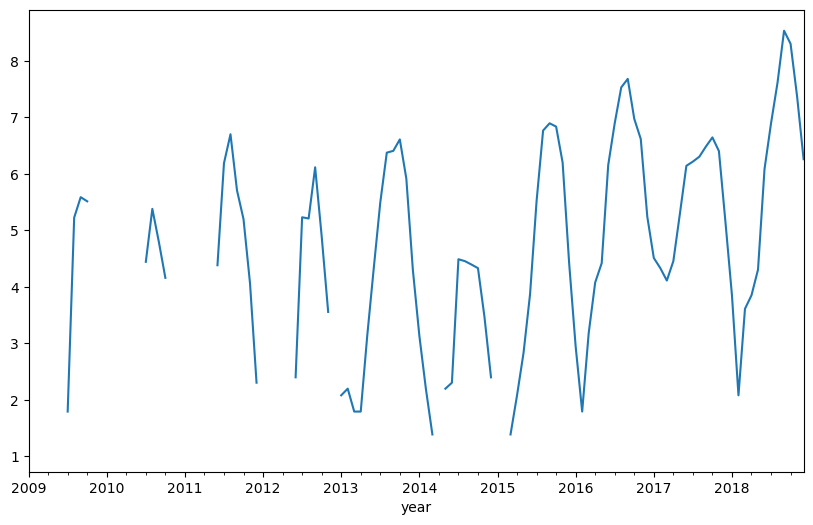

In [144]:
indexedDengu['adj_log'].dropna().plot()

In [145]:
indexedDengu['adj_log'].isnull().sum()

0

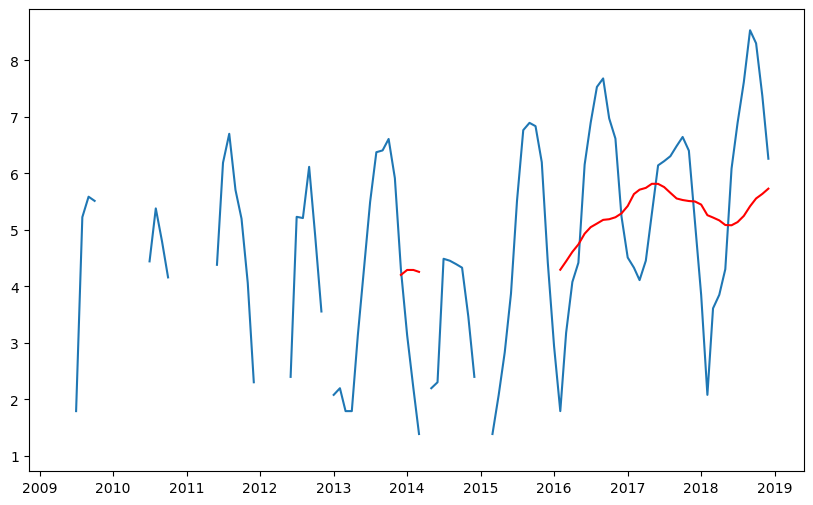

In [146]:
movingAverage = indexedDengu['adj_log'].rolling(window = 12).mean()
movingSTD = indexedDengu['adj_log'].rolling(window = 12).std()
plt.plot(indexedDengu['adj_log'])
plt.plot(movingAverage, color = "red")

In [147]:
datasetLogScaleMinusMovingAverage['adj_log'] = indexedDengu['adj_log'] - movingAverage
datasetLogScaleMinusMovingAverage['adj_log'].head(10)


#Remove Non Values
datasetLogScaleMinusMovingAverage['adj_log'].dropna(inplace = True)
datasetLogScaleMinusMovingAverage['adj_log'].head(10)

year
2013-12-01    0.101482
2014-01-01   -1.155093
2014-02-01   -2.093363
2014-03-01   -2.870504
2016-02-01   -2.503094
2016-03-01   -1.266113
2016-04-01   -0.533137
2016-05-01   -0.323970
2016-06-01    1.221743
2016-07-01    1.848642
Name: adj_log, dtype: float64

In [148]:
datasetLogScaleMinusMovingAverage['adj_log'].isnull().sum()

0

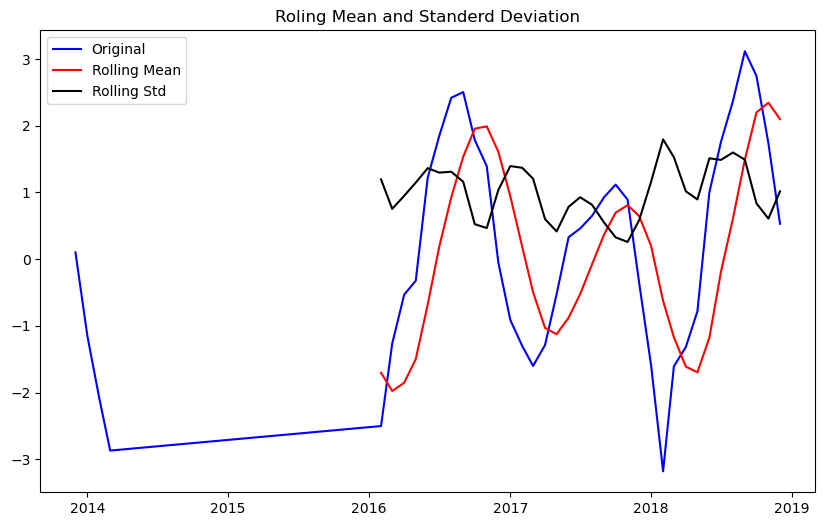

Result of Dickey Fuller Test: 
Test Statistic                  -5.492329
p-value                          0.000002
#Lags Used                       3.000000
Number of Observations Used     35.000000
Critical Value (1%)             -3.632743
Critical Value (5%)             -2.948510
Critical Value (10%)            -2.613017
dtype: float64


In [149]:
test_stationarity(datasetLogScaleMinusMovingAverage['adj_log'])

<AxesSubplot:xlabel='year'>

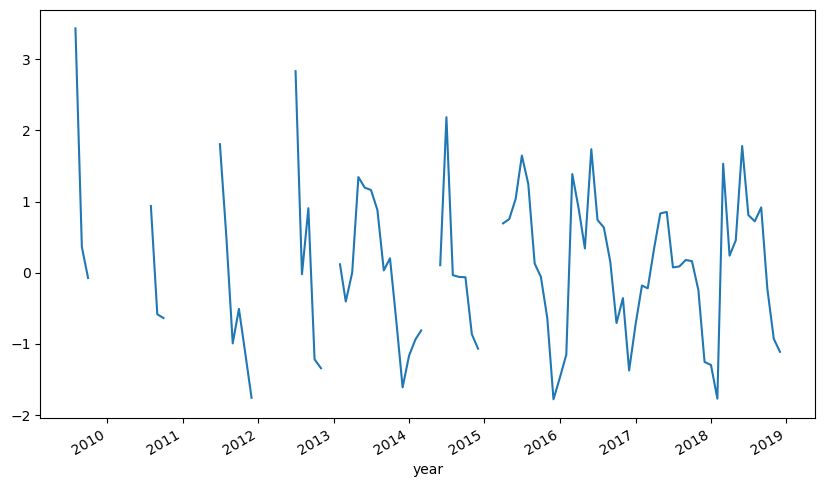

In [150]:
indexedDengu['Cases_log_diff'] = indexedDengu['adj_log'] - indexedDengu['adj_log'].shift()
indexedDengu['Cases_log_diff'].dropna().plot()

In [151]:
indexedDengu['Cases_log_diff'].isnull().sum()

22

In [152]:
indexedDengu_Cases_log_diff_1=indexedDengu['Cases_log_diff'].dropna()

In [153]:
indexedDengu_Cases_log_diff_1.isnull().sum()

0

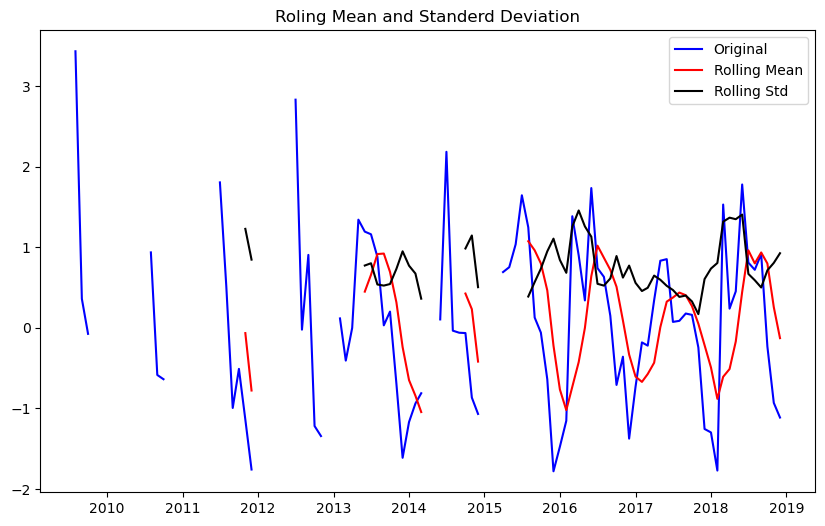

Result of Dickey Fuller Test: 


MissingDataError: exog contains inf or nans

In [154]:
test_stationarity(indexedDengu_Cases_log_diff_1)

                                    Square root Transformation

In [102]:
            ####################### Calculate the square root ##########################

In [99]:
indexedDengu['adj_sqrt'] = np.sqrt(indexedDengu['Cases'])

<AxesSubplot:xlabel='year'>

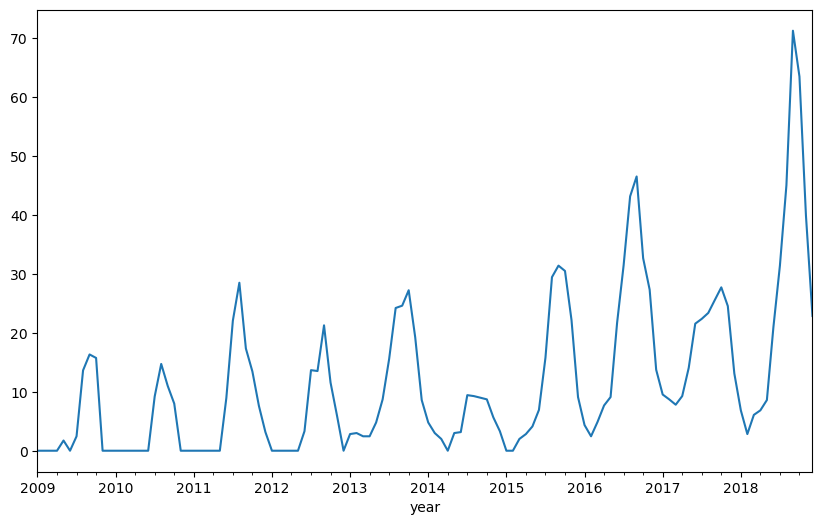

In [100]:
indexedDengu['adj_sqrt'].dropna().plot()

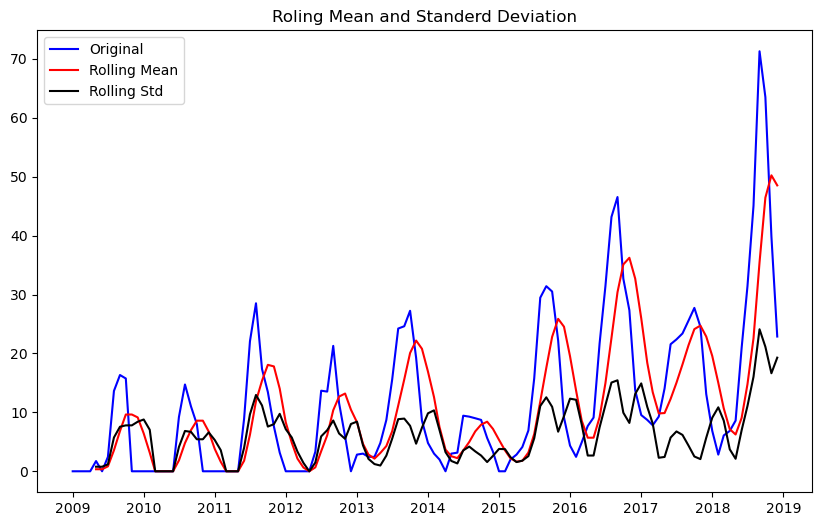

Result of Dickey Fuller Test: 
Test Statistic                   -0.311410
p-value                           0.923873
#Lags Used                        9.000000
Number of Observations Used     110.000000
Critical Value (1%)              -3.491245
Critical Value (5%)              -2.888195
Critical Value (10%)             -2.580988
dtype: float64


In [77]:
test_stationarity(indexedDengu['adj_sqrt'])

<AxesSubplot:xlabel='year'>

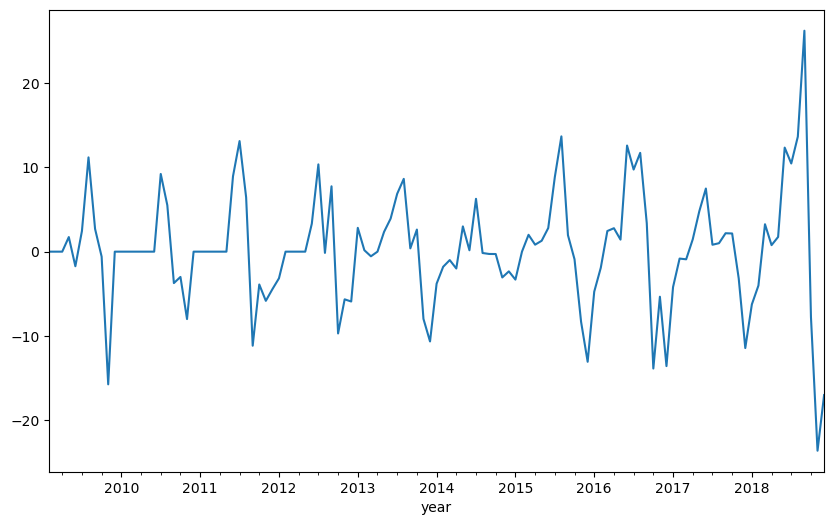

In [80]:
indexedDengu['Cases_sqrt_diff'] = indexedDengu['adj_sqrt'] - indexedDengu['adj_sqrt'].shift(1)
indexedDengu['Cases_sqrt_diff'].dropna().plot()

In [81]:
indexedDengu_Cases_sqrt_diff_1=indexedDengu['Cases_sqrt_diff'].dropna()

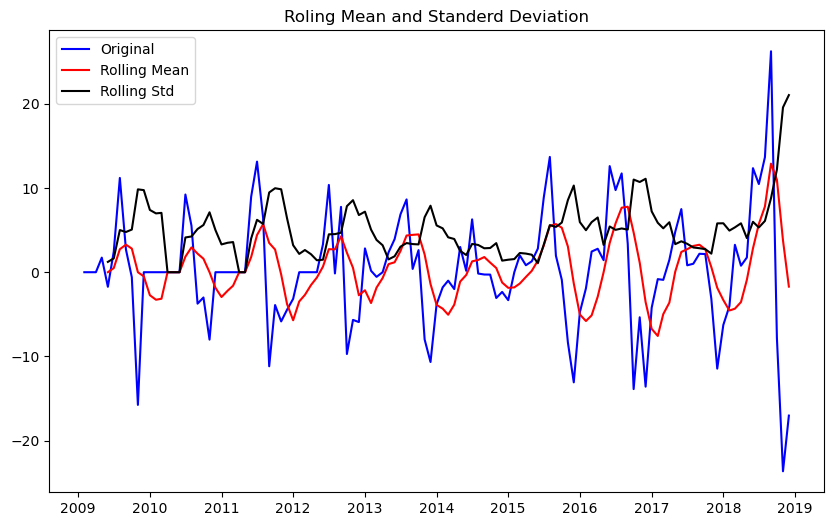

Result of Dickey Fuller Test: 
Test Statistic                 -8.605332e+00
p-value                         6.696414e-14
#Lags Used                      8.000000e+00
Number of Observations Used     1.100000e+02
Critical Value (1%)            -3.491245e+00
Critical Value (5%)            -2.888195e+00
Critical Value (10%)           -2.580988e+00
dtype: float64


In [82]:
test_stationarity(indexedDengu_Cases_sqrt_diff_1)

                                           Cubed root Transformation

In [106]:
                  ######################## Calculate the cubed root #############################

In [107]:
indexedDengu['adj_cbrt'] = np.cbrt(indexedDengu['Cases'])

<AxesSubplot:xlabel='year'>

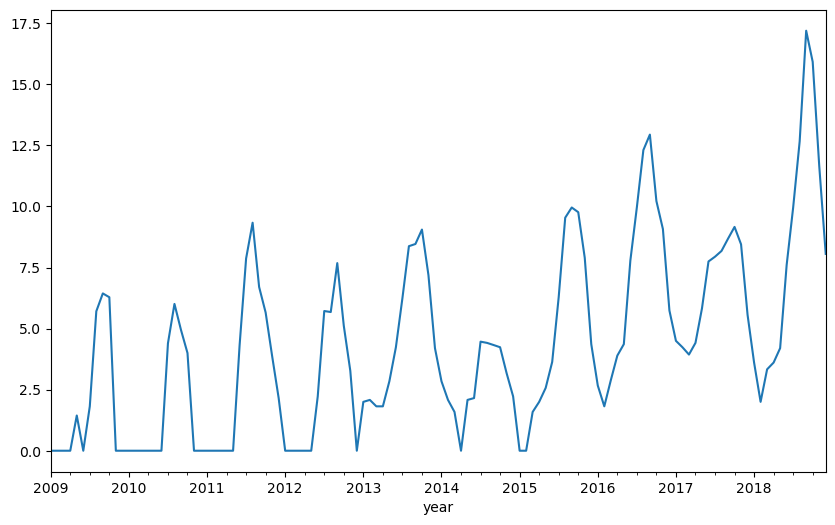

In [108]:
indexedDengu['adj_cbrt'].dropna().plot()

In [110]:
indexedDengu['adj_cbrt'].isnull().sum()

0

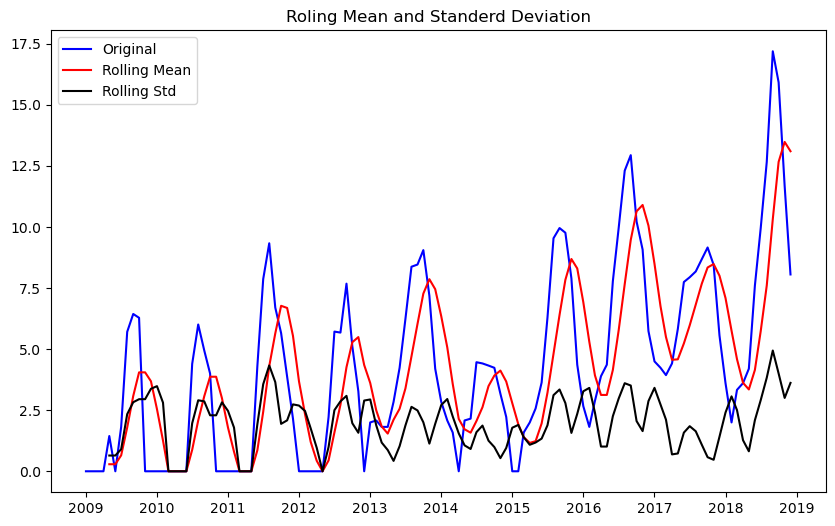

Result of Dickey Fuller Test: 
Test Statistic                   -0.247064
p-value                           0.932674
#Lags Used                        9.000000
Number of Observations Used     110.000000
Critical Value (1%)              -3.491245
Critical Value (5%)              -2.888195
Critical Value (10%)             -2.580988
dtype: float64


In [111]:
test_stationarity(indexedDengu['adj_cbrt'])

# Method 3- Rolling statistics

In [83]:
indexedDengu['#MA20'] = indexedDengu['Cases'].rolling(window = 8).mean()

<AxesSubplot:xlabel='year'>

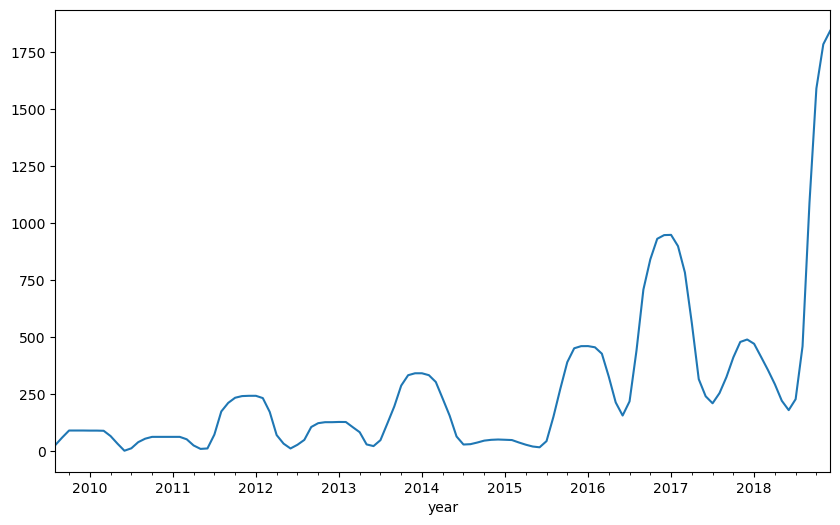

In [84]:
indexedDengu['#MA20'].dropna().plot()

In [85]:
indexedDengu['#MA20'].isnull().sum()

7

In [86]:
indexedDengu_MA20_1=indexedDengu['#MA20'].dropna()

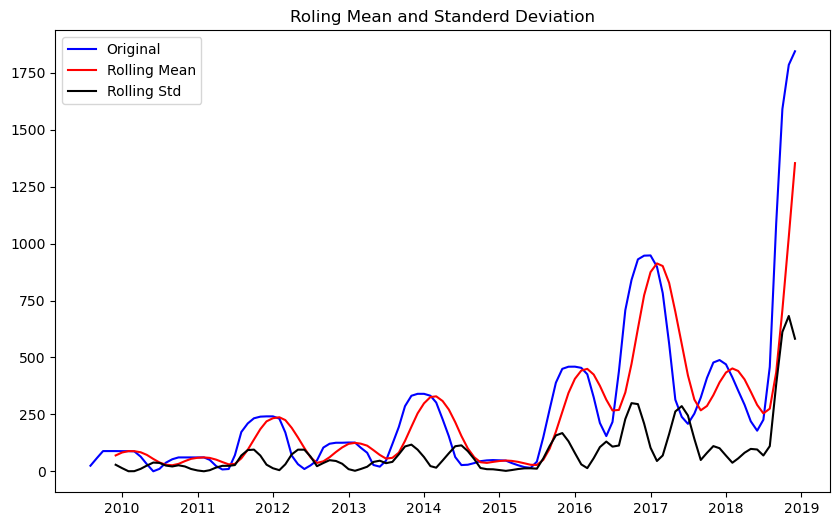

Result of Dickey Fuller Test: 
Test Statistic                   -0.429815
p-value                           0.905000
#Lags Used                        9.000000
Number of Observations Used     103.000000
Critical Value (1%)              -3.495493
Critical Value (5%)              -2.890037
Critical Value (10%)             -2.581971
dtype: float64


In [87]:
test_stationarity(indexedDengu_MA20_1)

# Component of Time Series

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDengu["Cases"])

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [123]:
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

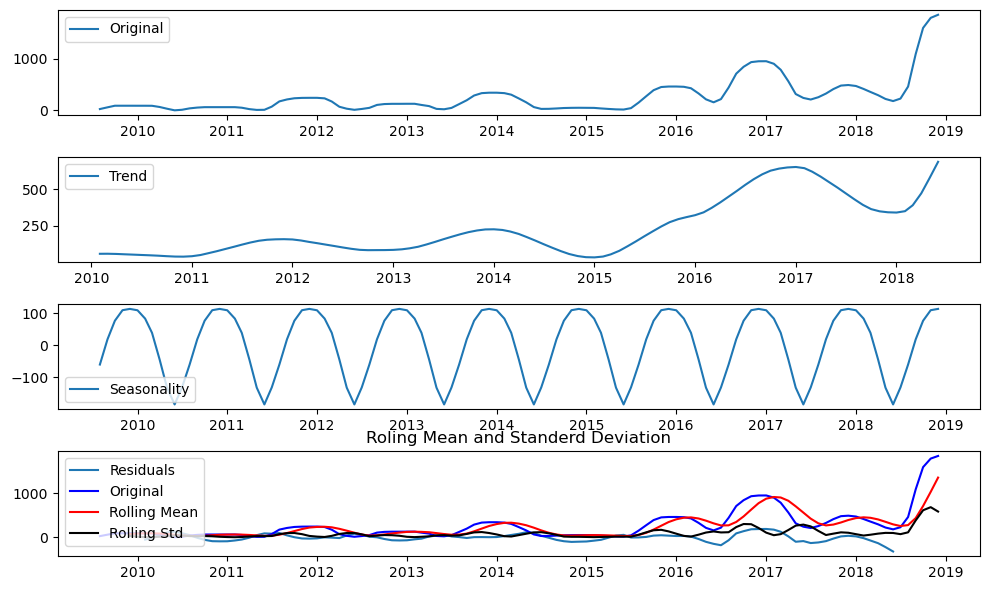

Result of Dickey Fuller Test: 
Test Statistic                   -0.429815
p-value                           0.905000
#Lags Used                        9.000000
Number of Observations Used     103.000000
Critical Value (1%)              -3.495493
Critical Value (5%)              -2.890037
Critical Value (10%)             -2.581971
dtype: float64


In [124]:
plt.subplot(411)
plt.plot(indexedDengu_MA20_1, label = 'Original')
plt.legend(loc= 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc= 'best')

plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc= 'best')

plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend(loc= 'best')

plt.tight_layout()
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(indexedDengu_MA20_1)

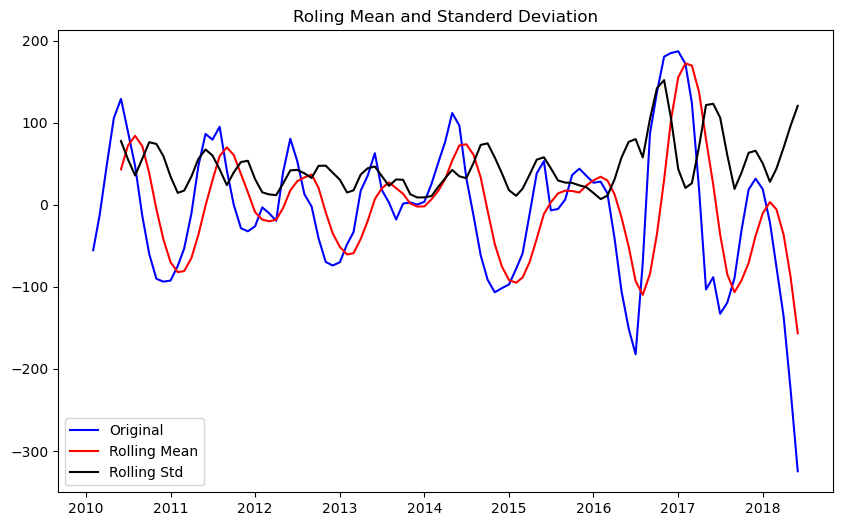

Result of Dickey Fuller Test: 
Test Statistic                  -5.185005
p-value                          0.000009
#Lags Used                       1.000000
Number of Observations Used     99.000000
Critical Value (1%)             -3.498198
Critical Value (5%)             -2.891208
Critical Value (10%)            -2.582596
dtype: float64


In [125]:
#check noice 
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

# Autocorrelation function(ACF) and Partial Autocorrelation Function(PACF) Graph

ACF Definition - A function which gives us values of auto-correlation of any series with its lagged values. 

PACF Definition - An indirect function to find Auto correlation after removing the relationship explained by previous lags

In [157]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf  = acf (indexedDengu_MA20_1, nlags= 50)
lag_pacf = pacf(indexedDengu_MA20_1, nlags= 50, method ='ols') 
#ols =Ordinary Least Squares regression method

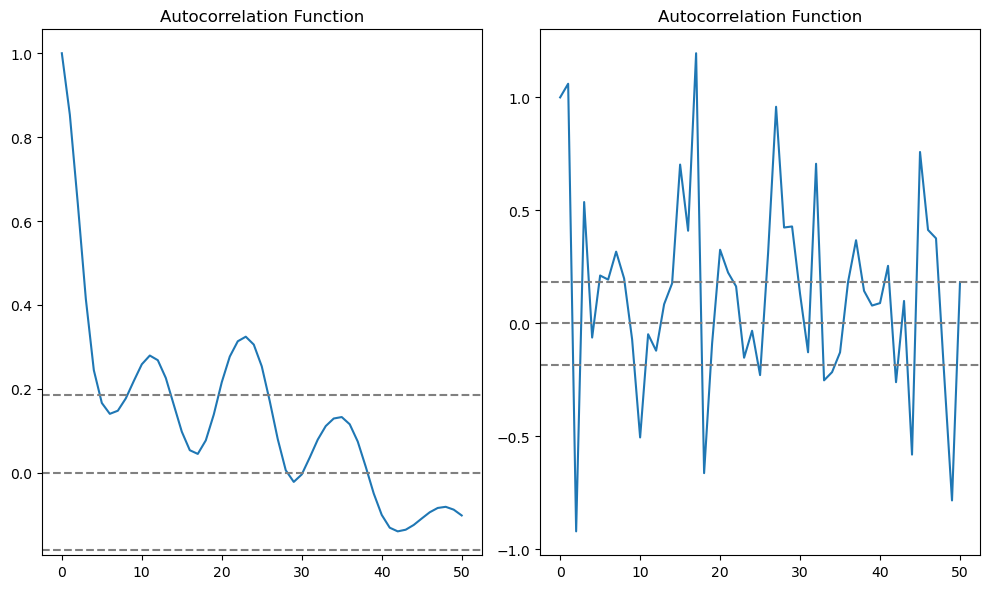

In [158]:
#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y= 0 , linestyle= '--', color= 'gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDengu_MA20_1)) , linestyle= '--', color= 'gray')
plt.axhline(y= 1.96/np.sqrt(len(indexedDengu_MA20_1)) , linestyle= '--', color= 'gray')
plt.title("Autocorrelation Function")

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y= 0 , linestyle= '--', color= 'gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDengu_MA20_1)) , linestyle= '--', color= 'gray')
plt.axhline(y= 1.96/np.sqrt(len(indexedDengu_MA20_1)) , linestyle= '--', color= 'gray')
plt.title("Autocorrelation Function")
plt.tight_layout()

In [160]:
!pip install pmdarima

     ------------------------------------- 572.0/572.0 kB 67.4 kB/s eta 0:00:00


In [161]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [162]:
arimamodel(indexedDengu_MA20_1)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1361.276, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1259.379, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1258.927, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1362.001, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1226.347, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1218.743, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1216.860, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1218.807, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1215.837, Time=0.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1216.511, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1215.288, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1213.307, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1222.103, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : 

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

# Autoregressive Integrated Moving Average (ARIMA)

In [163]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [164]:
# # fit model
# ARIMAmodel = sm.tsa.arima.ARIMA(indexedDengu_MA20_1, order=(2,1,2)) #notice p,d and q value here

# ARIMA_model_fit = ARIMAmodel.fit()

# # make prediction
# ypredicted = ARIMA_model_fit.predict(len(indexedDengu_MA20_1), len(indexedDengu_MA20_1)+2, typ='levels')
# print(ypredicted)



# #model = sm.tsa.arima.ARIMA(train_data, order=(1,1,2))
# #result = model.fit()

2019-01-01    1762.179155
2019-02-01    1548.385270
2019-03-01    1269.185779
Freq: MS, Name: predicted_mean, dtype: float64


I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
I:\ML-Code\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting ARIMA model


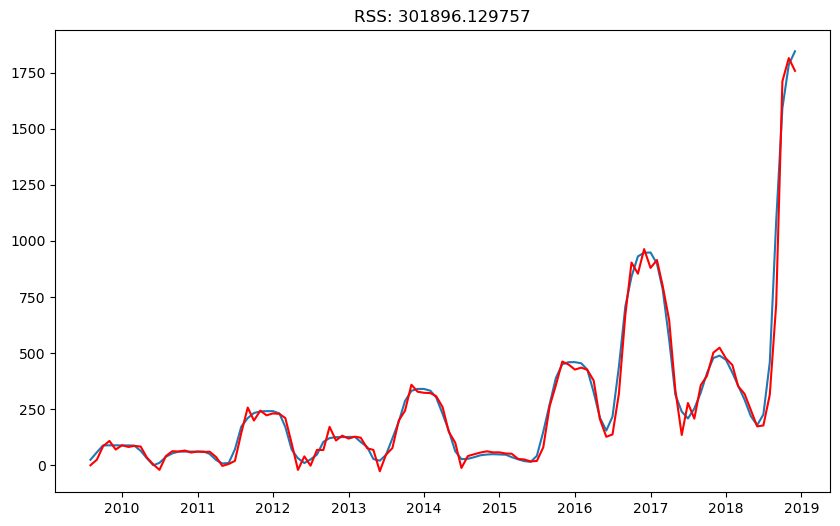

In [175]:
model = sm.tsa.arima.ARIMA(indexedDengu_MA20_1, order=(2, 1, 2))
result_ARIMA = model.fit()
plt.plot(indexedDengu_MA20_1)
plt.plot(result_ARIMA.fittedvalues, color= 'red')
plt.title('RSS: %4f'% sum((result_ARIMA.fittedvalues - indexedDengu_MA20_1)**2))
print('Plotting ARIMA model')

In [176]:
predictions_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

year
2009-08-01      0.000000
2009-09-01     24.632012
2009-10-01     84.553745
2009-11-01    108.455520
2009-12-01     70.062451
dtype: float64


In [177]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

year
2009-08-01      0.000000
2009-09-01     24.632012
2009-10-01    109.185757
2009-11-01    217.641277
2009-12-01    287.703729
dtype: float64


In [180]:
predictions_ARIMA_log= pd.Series(indexedDengu_MA20_1, index= indexedDengu_MA20_1.index)
predictions_ARIMA_log= predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value= 0)
predictions_ARIMA_log.head()

year
2009-08-01     24.375000
2009-09-01     82.382012
2009-10-01    197.935757
2009-11-01    306.391277
2009-12-01    376.453729
dtype: float64

I:\ML-Code\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


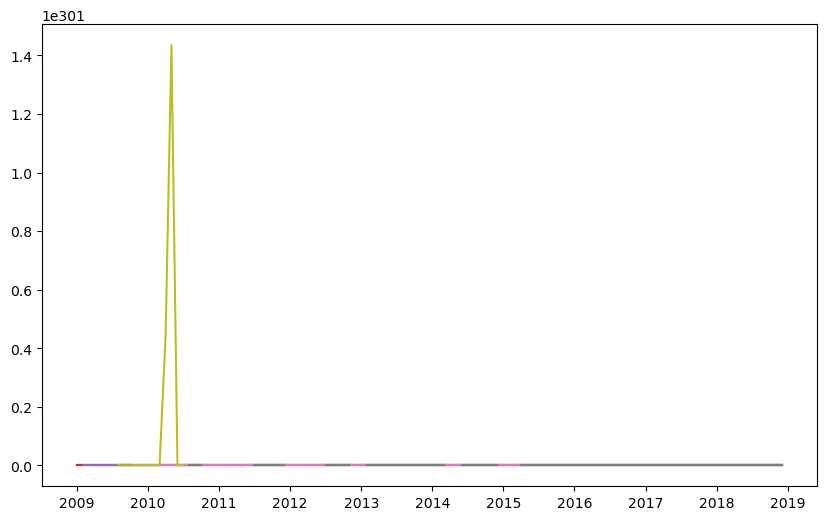

In [181]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDengu)
plt.plot(predictions_ARIMA)

In [182]:
indexedDengu_MA20_1

year
2009-08-01      24.375
2009-09-01      57.750
2009-10-01      88.750
2009-11-01      88.750
2009-12-01      88.750
                ...   
2018-08-01     458.750
2018-09-01    1088.125
2018-10-01    1591.375
2018-11-01    1785.625
2018-12-01    1845.125
Name: #MA20, Length: 113, dtype: float64

In [ ]:
# i want to predict 2 year data .
# so 113+24= 317

In [184]:
result_ARIMA.plot_predict(1,317)
#x = result_ARIMA.forcast(step= 120)

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [185]:
result_ARIMA.forcast(step= 24)

AttributeError: 'ARIMAResults' object has no attribute 'forcast'